<a href="https://colab.research.google.com/github/Adeliin/Great/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22s5_6_corr_viz_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Семинар 5-6. Корреляция. Визуализация**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/aaparshina/FCI_22-23_data_analysis/main/data/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **Базовая визуализация**

viz.png

### Гистограмма распределения

<Axes: ylabel='Frequency'>

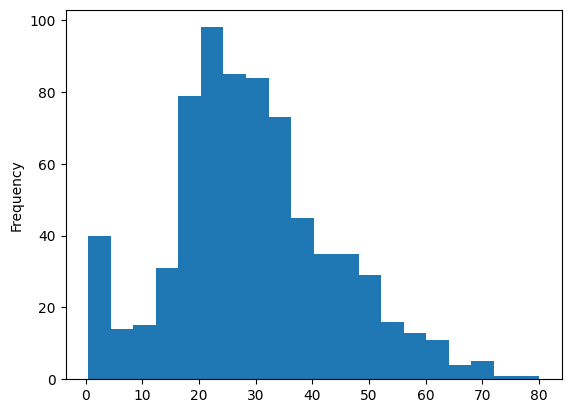

In [ ]:
df['Age'].plot(kind='hist', bins=20)

### Ящик-с-усами

<Axes: >

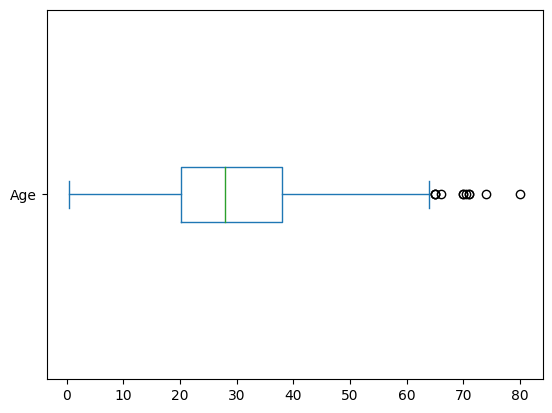

In [ ]:
df['Age'].plot(kind = "box", vert = False)

### Столбчатая диаграмма

<Axes: >

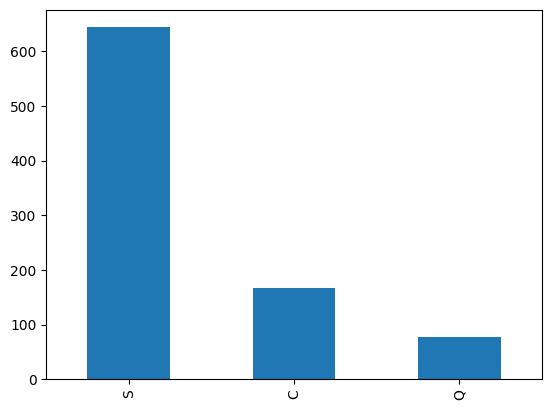

In [ ]:
df["Embarked"].value_counts().plot(kind = 'bar')

### Линейная диаграмма распределения

<Axes: >

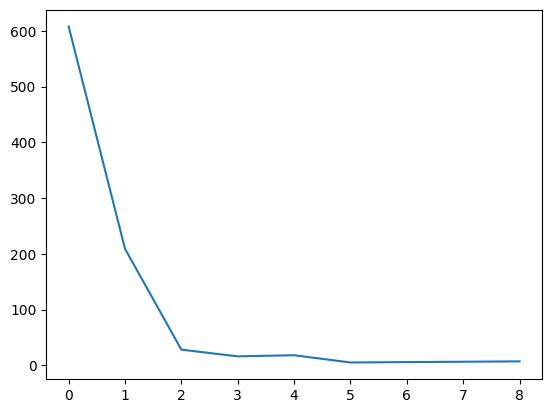

In [ ]:
df['SibSp'].value_counts().sort_index().plot()

### Круговая диаграмма

<Axes: ylabel='SibSp'>

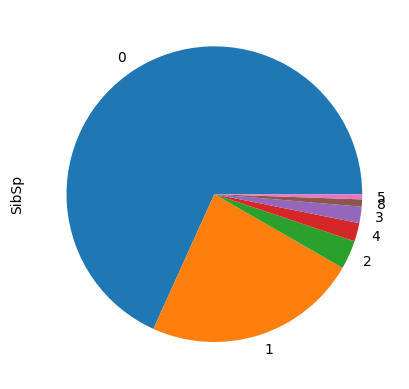

In [ ]:
df['SibSp'].value_counts().plot(kind = 'pie')

### Диаграмма рассеяния

<Axes: xlabel='Age', ylabel='Fare'>

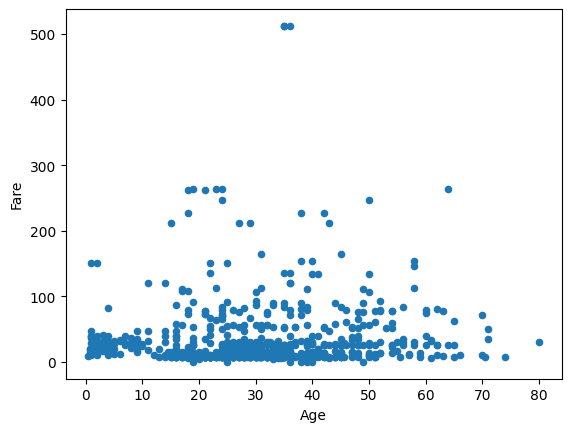

In [ ]:
df.plot("Age", "Fare", kind = "scatter")

## **Корреляция**

### Свойства корреляции

**Корреляция** - степень линейной взаимосвязи между двумя величинами

1. Изменяется от -1 до 1
2. Положительный коэффициент корреляции свидетельствует о прямой зависимости
3. Отрицательный коэффициент корреляции свидетельствует об обратной зависимости


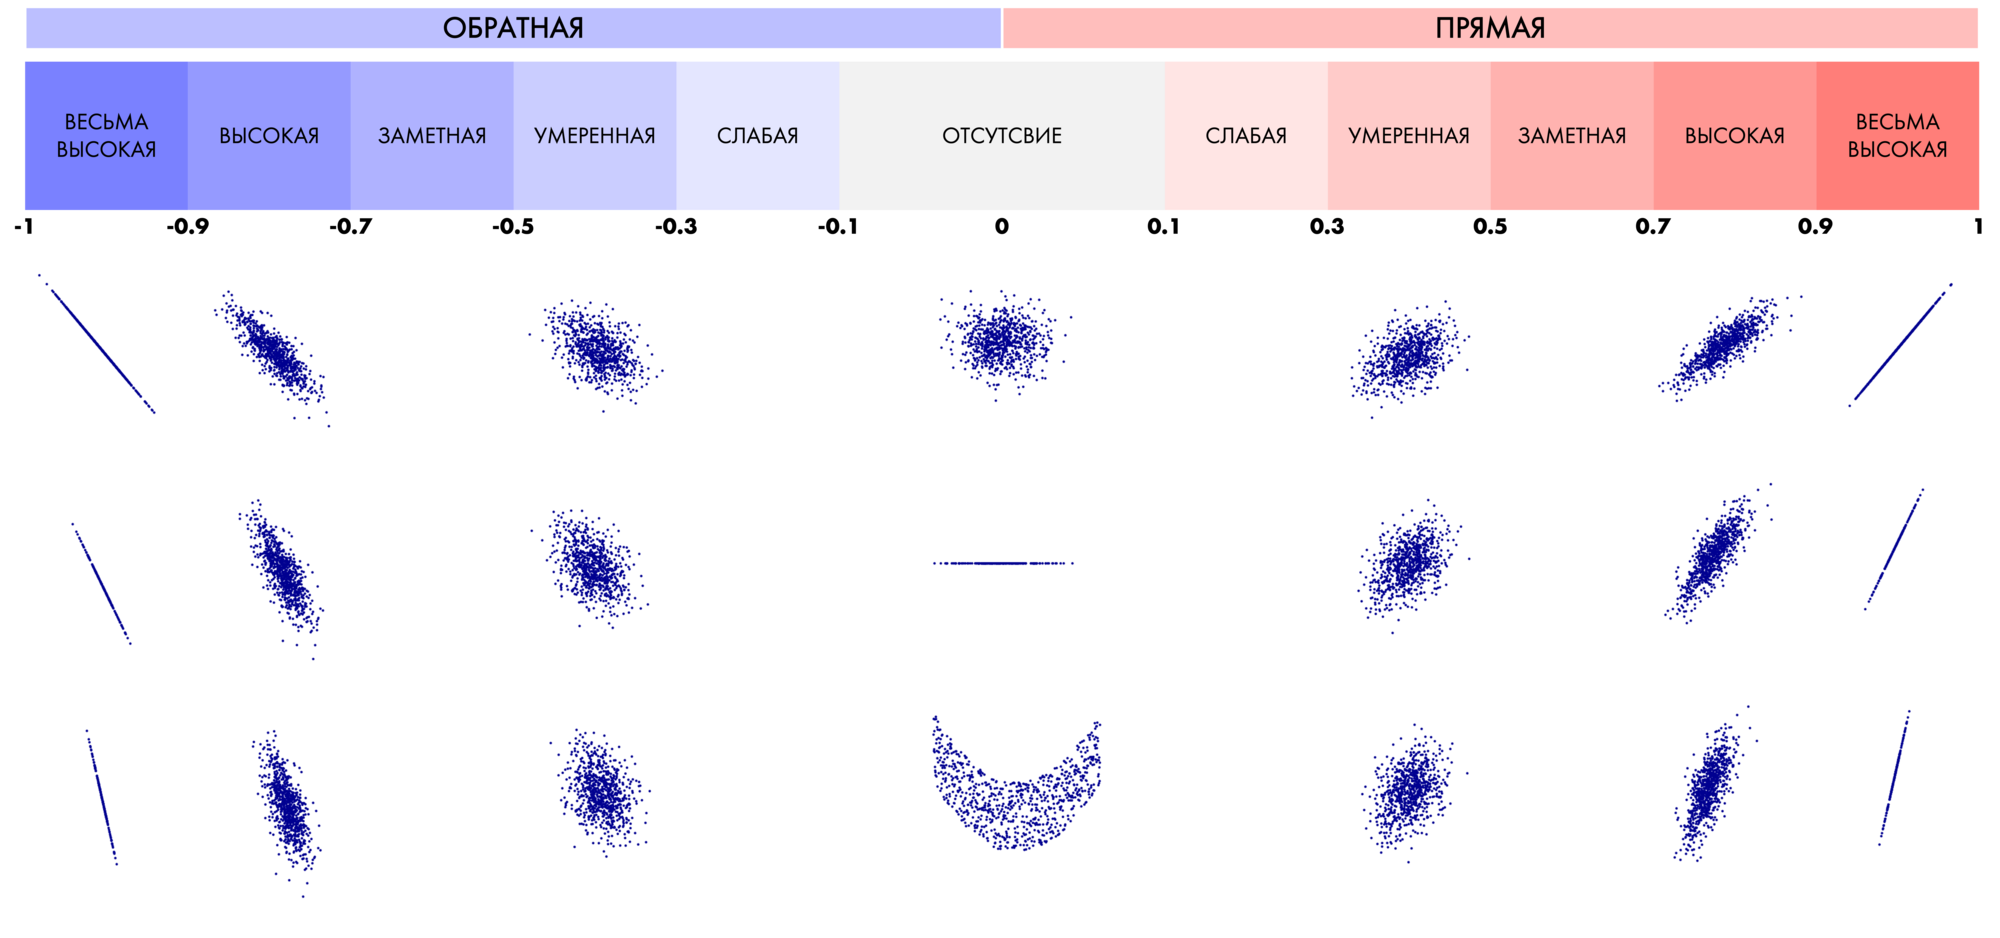

**ВАЖНО!**
1. Корреляция **не подразумевает причинно-следственной связи**. Если между признаками А и Б есть тесная взаимосвязь, то мы **НЕ** можем говорить, что А влияет на Б или Б влияет на А.
2. Корреляция **чувствительны к выбросам**.*
3. Коэффициент корреляции Пирсона **не фиксирует нелинейные отношения** между двумя переменными. Пример ниже.

**Где и как можно использовать корреляцию на практике**:
- на основе корреляции можно делать базовые предпосылки к прогнозированию (более корректно - модели, например, регрессионные)
- корреляцию можно использовать для оценки валидности разных тестов. Например, если психолог разработал тест для определения уровня тревоги, то его результаты должны показывать сильную корреляцию с другими показателями, которые точно идентифицируют тревожность (например, физиологические индикаторы).
- с помощью корреляции можно определить надежность оценочных инструментов. Например, предположим, группа людей сдает экзамен два раза через небольшие промежутки времени. Результаты первой попытки и второй попытки должны быть практически одинаковые, если экзамен действительно хорошо составлен и условия проведения не изменились. Иными словами, если корреляция между результатами сильная, то можно говорить о надежности инструмента.



### Рассчет коэффицента корреляции

**Коэффициент корреляции Пирсона (r)** позволяет оценить силу и направление линейной взаимосвязи между числовыми непрерывными данными  <br><br>
$$
    r = \frac{\sum{(x-M_x)(y-M_y)}}{\sqrt{\sum{(x-M_x)^2}\sum{(y-M_y)^2}}} = \frac{cov({x, y})}{\sigma_x * \sigma_y}
$$<br>

СПОСОБ 1:

In [ ]:
data = pd.DataFrame(data = [[2, 4, 1, 3, 5],
                          [6, 8, 1, 7, 3]],
                  index = ['x', 'y']).T
data

,x,y
0,2,6
1,4,8
2,1,1
3,3,7
4,5,3


In [ ]:
data['x - mu_x'] = data['x'] - data['x'].mean()
data['y - mu_y'] = data['y'] - data['y'].mean()
data

,x,y,x - mu_x,y - mu_y
0,2,6,-1.0,1.0
1,4,8,1.0,3.0
2,1,1,-2.0,-4.0
3,3,7,0.0,2.0
4,5,3,2.0,-2.0


In [ ]:
numerator = (data['x - mu_x'] * data['y - mu_y']).sum() #числитель
denominator = np.sqrt((data['x - mu_x'] ** 2).sum() * (data['y - mu_y'] ** 2).sum()) #знаменатель
r = round(numerator / denominator, 2) # округлим до двух знаков после запятой
print(f'Коэффициент корреляции (r) = {numerator} / {round(denominator, 2)} = {r}')

Коэффициент корреляции (r) = 6.0 / 18.44 = 0.33


<Axes: xlabel='x', ylabel='y'>

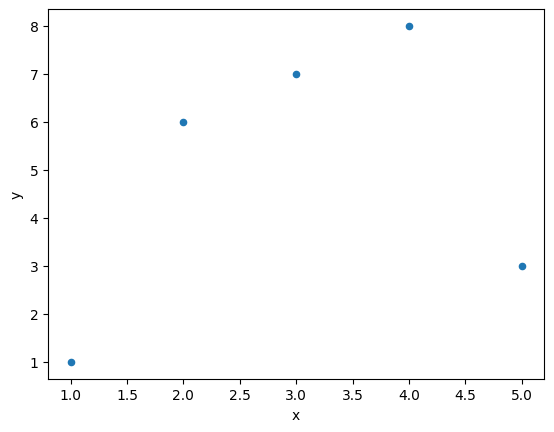

In [ ]:
data.plot("x", "y", kind = "scatter")

СПОСОБ 2:

In [ ]:
df['x'].corr(df['y'])

0.32539568672798425

СПОСОБ 3:

In [ ]:
df = pd.DataFrame(data = [[2, 4, 1, 3, 5],
                          [6, 8, 1, 7, 3],
                          [7, 8, 1, 3, 3]],
                  index = ['x', 'y', 'z']).T
df

,x,y,z
0,2,6,7
1,4,8,8
2,1,1,1
3,3,7,3
4,5,3,3


In [ ]:
df.corr()

,x,y,z
x,1.000000,0.325396,0.266501
y,0.325396,1.000000,0.780464
z,0.266501,0.780464,1.000000


## **Визуализация `matplotlib`**

In [ ]:
!pip install matplotlib

In [ ]:
from matplotlib import pyplot as plt

**rating_announcement** - рейтинг регионов по количеству объявлений о продаже

**rating_announcement_change** - изменение рейтинга регионов по количеству объявлений о продаже

**region** - регион

**announcement_count** - общее количество активных объявлений о продаже

**announcement_count_resale** - активных объявлений, вторичка
        
**announcement_count_new** - активных объявлений, новостройки
       
**avg_price_resale** - cредняя стоимость м², вторичка

**avg_price_new** - cредняя стоимость м², новостройки

**rating_loan** - рейтинг регионов по количеству заявок на кредит

**rating_loan_change** - изменение рейтинга регионов по количеству заявок на кредит

**min_numb_of_appr_loan** - минимальное количество одобренных заявок
       
**share_of_onln_loan** - доля онлайн-заявок на кредит

**share_of_office_loan** - доля заявок в офисе банка

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/!hse_study/HSB_DS_22_23/sem/s5-6.corr.vis/dom_click.xlsx',
                   index_col = "Unnamed: 0")
df.head()

,rating_announcement,rating_announcement_change,region,announcement_count,announcement_count_resale,announcement_count_new,avg_price_resale,avg_price_new,rating_loan,rating_loan_change,min_numb_of_appr_loan,share_of_onln_loan,share_of_office_loan
0,1,0,Краснодарский Край,228037,75809,52225.0,127764,132270.0,3,0,5000.0,0.47,0.53
1,2,0,Московская Область,172242,57247,34838.0,153659,181756.0,1,1,10000.0,0.62,0.38
2,3,0,Москва,145131,65638,56824.0,275281,315195.0,2,-1,10000.0,0.60,0.40
3,4,0,Санкт-Петербург,93237,44008,40695.0,188425,236205.0,4,0,5000.0,0.53,0.47
4,5,1,Ростовская Область,88638,41625,17202.0,93333,105500.0,11,-2,5000.0,0.46,0.54


### Гистограмма

In [ ]:
df["announcement_count"].mode()[0]

64

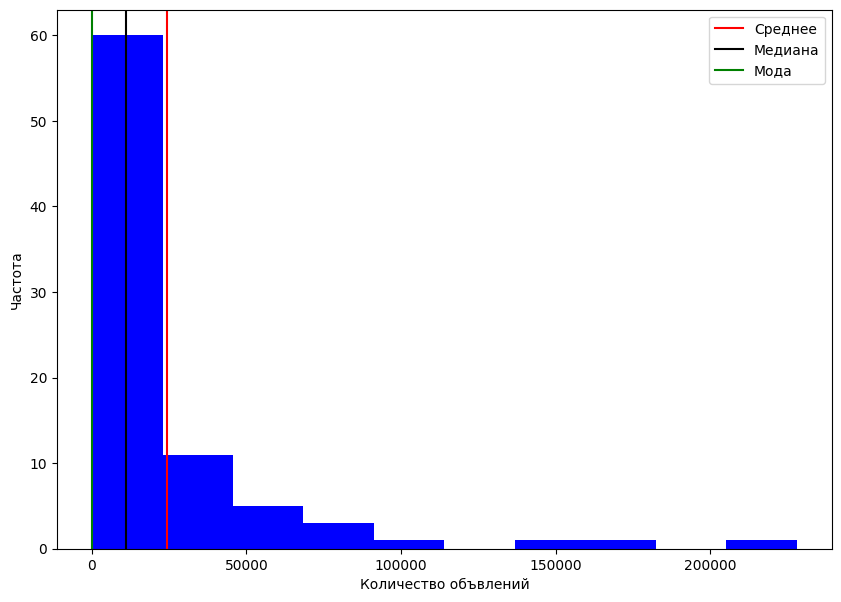

In [ ]:
plt.figure(figsize = [10, 7]) #размер графика

plt.hist(df["announcement_count"], bins=10, color = "blue") #гистограмма
plt.xlabel("Количество объвлений") #подпись оси x
plt.ylabel("Частота") #подпись оси y

plt.axvline(df["announcement_count"].mean(), color = "red", label = "Среднее") #вертикальная линия (среднее)
plt.axvline(df["announcement_count"].median(), color = "black", label = "Медиана") #вертикальная линия (медиана)
plt.axvline(df["announcement_count"].mode()[0], color = "green", label = "Мода")
plt.legend(); #выводим легенду

### Ящик с усами

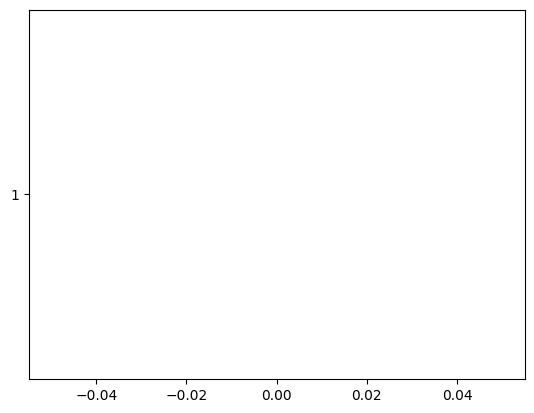

In [ ]:
plt.boxplot(df['avg_price_new'], vert = False);

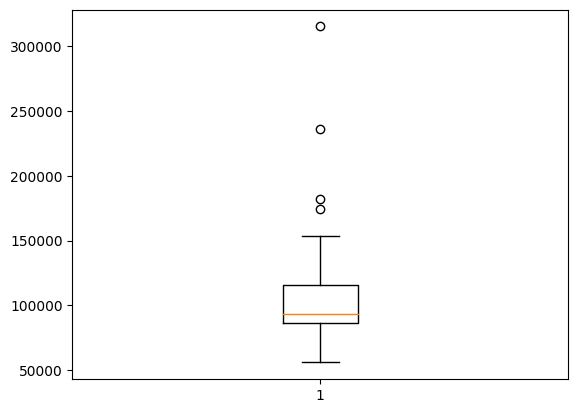

In [ ]:
df["apn_fillna"] = df['avg_price_new'].fillna(df['avg_price_new'].median())
plt.boxplot(df["apn_fillna"]);#, vert = False);

Text(0.5, 1.0, 'Распределение цены (руб.)')

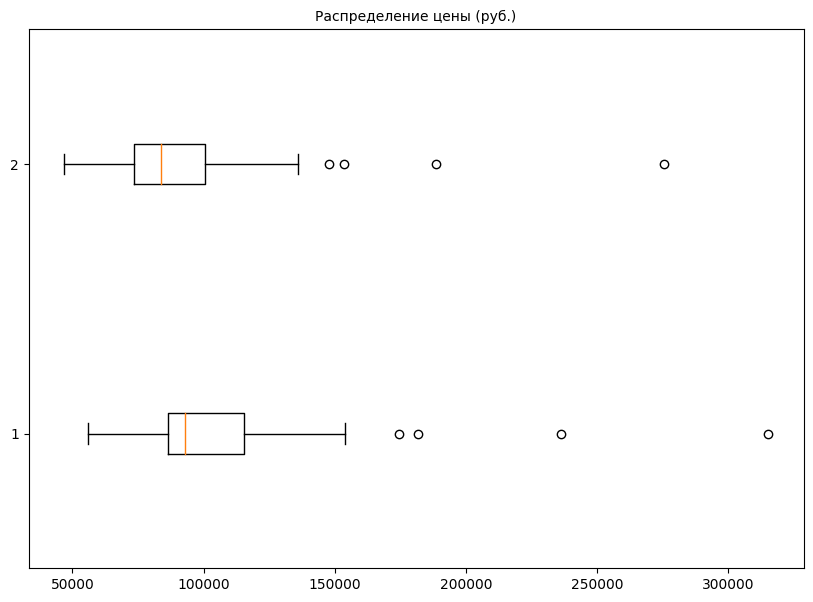

In [ ]:
df["apn_fillna"] = df['avg_price_new'].fillna(df['avg_price_new'].median())

plt.figure(figsize = [10, 7]) #размер графика

plt.boxplot(df[["apn_fillna", "avg_price_resale"]], vert = False) #ящик с усами

plt.yticks([1, 2], labels = ["Средняя стоимость м², новостройки", "Средняя стоимость м², вторичка"]) #измение названий тиксов

plt.title('Распределение цены (руб.)', fontsize = 10)

### Круговая диаграмма

In [ ]:
df["share_diff"] = df.apply(lambda x: "Банк" if x["share_of_office_loan"]>x["share_of_onln_loan"]
                            else ("Oнлайн" if x["share_of_office_loan"]<x["share_of_onln_loan"]
                                  else "Банк/Онлайн"), axis =1)

In [ ]:
df["share_diff"].value_counts()

Банк           60
Oнлайн         15
Банк/Онлайн     8
Name: share_diff, dtype: int64

In [ ]:
df["share_diff"].value_counts().values

array([60, 15,  8])

In [ ]:
df["share_diff"].value_counts().index

Index(['Банк', 'Oнлайн', 'Банк/Онлайн'], dtype='object')

Text(0.5, 1.0, 'Оформление кредитов')

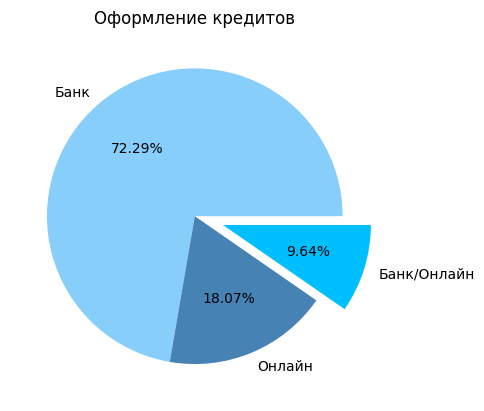

In [ ]:
plt.pie(x = df["share_diff"].value_counts().values,
        labels = df["share_diff"].value_counts().index,
        # explode - под каждый тип расхода насколько "вытащить" сектор из круга. полезно, если нужно акцентировать на нем внимание
        explode = [0, 0, 0.2],
        colors = ['lightskyblue', 'steelblue', 'deepskyblue'],
        autopct = '%1.2f%%', # этим параметром задаем формат строки вывода процентов (они считаются автоматически)
        pctdistance = 0.6, # насколько отдалены надписи с процентами от центра
        labeldistance = 1.1); # насколько отдалены надписи с типом расходов от центра);
plt.title('Оформление кредитов')

### Столбчатая диаграмма

In [ ]:
df.sort_values("avg_price_resale", ascending = False)[:5]

,rating_announcement,rating_announcement_change,region,announcement_count,announcement_count_resale,announcement_count_new,avg_price_resale,avg_price_new,rating_loan,rating_loan_change,min_numb_of_appr_loan,share_of_onln_loan,share_of_office_loan,apn_fillna,share_diff
2,3,0,Москва,145131,65638,56824.0,275281,315195.0,2,-1,10000.0,0.60,0.40,315195.0,Oнлайн
3,4,0,Санкт-Петербург,93237,44008,40695.0,188425,236205.0,4,0,5000.0,0.53,0.47,236205.0,Oнлайн
1,2,0,Московская Область,172242,57247,34838.0,153659,181756.0,1,1,10000.0,0.62,0.38,181756.0,Oнлайн
53,54,-2,Сахалинская Область,7886,4453,1200.0,147619,174337.0,72,1,500.0,0.59,0.41,174337.0,Oнлайн
8,9,0,Ленинградская Область,56628,14296,19989.0,136170,142331.0,32,1,1000.0,0.60,0.40,142331.0,Oнлайн


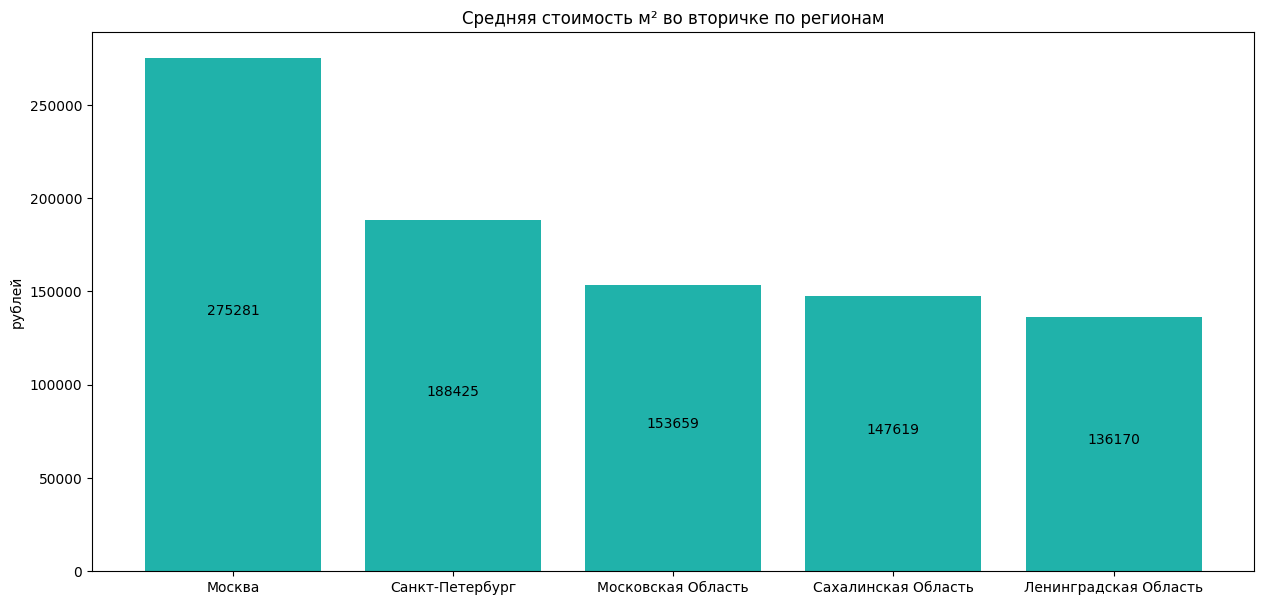

In [ ]:
#топ-5 регионов по стоимости недвижимости на вторичном рынке
df_filter = df.sort_values("avg_price_resale", ascending = False)[:5]

plt.figure(figsize = [15, 7]) #размер графика
# воспользуемся функцией bar (заполняем аргументы так же, как и в предыдущем случае)
plt.bar(df_filter['region'], df_filter['avg_price_resale'], color = 'lightseagreen')

# ниже вариант того, как можно добавить текст на столбчатую диаграмму
for i in range(df_filter['region'].shape[0]):
    plt.text(
        i,
        df_filter['avg_price_resale'].iloc[i] / 2, #положение отсноительность y
        df_filter['avg_price_resale'].iloc[i], #положение отсноительность x
        ha = 'center'
    )

# plt.xlabel('Регион')
plt.ylabel('рублей')
plt.title('Средняя стоимость м² во вторичке по регионам');

### Линейный график

In [ ]:
prices = pd.read_excel('/content/drive/MyDrive/!hse_study/HSB_DS_22_23/sem/s5-6.corr.vis/rate.xlsx')
prices.head()

,Дата,"Доллар, цена открытия","Доллар, максимальная цена","Доллар, минимальная цена","Доллар, цена закрытия","Доллар, объем торгов","Юань, цена открытия","Юань, цена максимальная цена","Юань, минимальная цена","Юань, цена закрытия","Юань, объем торгов","Газпром, цена открытия","Газпром, цена максимальная цена","Газпром, минимальная цена","Газпром, цена закрытия","Газпром, объем торгов"
0,2021-01-04,74.1350,74.4050,73.0550,74.3300,2196588000,11.4660,11.5120,11.3280,11.502,29061000,212.71,216.63,211.64,212.71,55195430.0
1,2021-01-05,74.1125,75.2875,73.8500,74.0400,2696328000,11.5365,11.6639,11.4700,11.510,26548000,213.20,215.38,210.22,215.32,48913740.0
2,2021-01-06,73.7800,74.2075,73.3975,73.9225,2002842000,11.4456,11.5004,11.4100,11.464,29617000,215.48,216.80,213.07,214.38,47897590.0
3,2021-01-08,74.2650,74.8350,73.8175,74.1550,2341573000,11.4780,11.5613,11.4425,11.468,12122000,217.14,226.24,217.00,225.49,100717800.0
4,2021-01-11,74.4325,75.0000,74.2650,74.6600,3943607000,11.4966,11.5639,11.4731,11.530,74169000,225.05,231.00,221.81,227.60,112506470.0


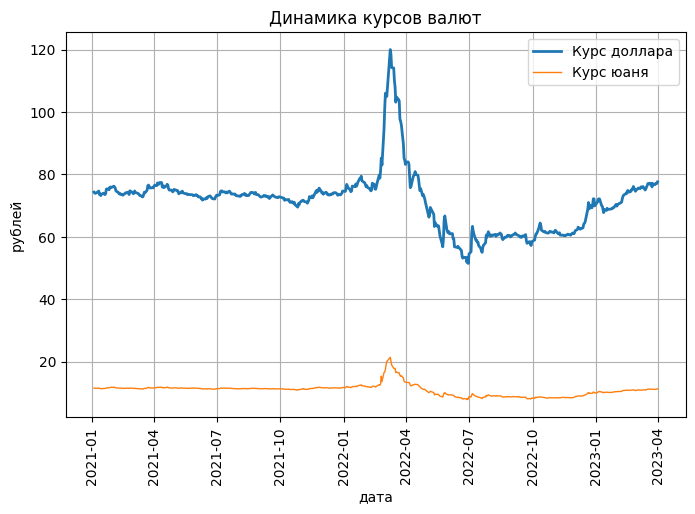

In [ ]:
plt.figure(figsize = [8, 5]) #размер графика

plt.plot(prices['Дата'], prices['Доллар, цена закрытия'], label = 'Курс доллара', linewidth = 2) # linewidth - толщина линии
plt.plot(prices['Дата'], prices['Юань, цена закрытия'], label = 'Курс юаня', linewidth = 1)

plt.title('Динамика курсов валют', fontsize = 12) #заголовок

plt.xlabel('дата')
plt.ylabel('рублей')

plt.xticks(rotation = 90) # поворачивает надписи на оси Ox против часов стрелки на 90 градусов (в обратную можно -90)

plt.legend() #легенда
plt.grid(); #сетка

### **Метод `subplots`**

В идеальной вселенной мы создаем графики функцией `subplots`, которая генерирует наш график в 2 переменные (обычно их называют fig и ax):

* `fig` отвечает за график в целом. Воспринимайте ее как файл, который хранит график как картинку
* `ax` $-$ это ось координат, на которой мы собственно строим график. Все элементы графика хранятся как раз в ней

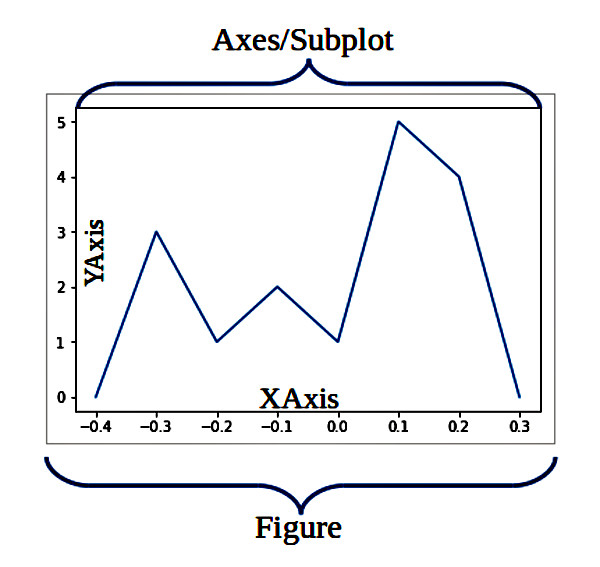

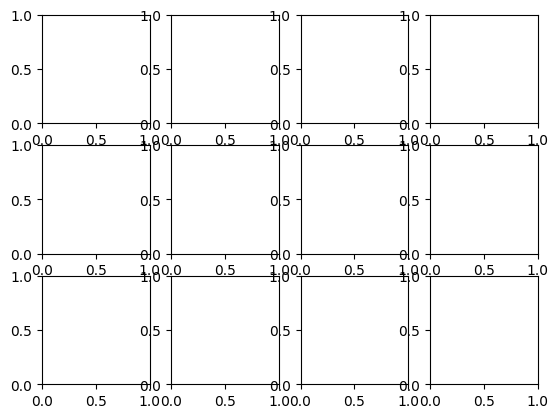

In [ ]:
fig, ax = plt.subplots(3,4) # создали полотно для графика из 1 ряда и 2 колонки (1 график)


In [ ]:
gb = prices.groupby("Дата")["Доллар, объем торгов"].sum()
gb.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-08',
               '2021-01-11', '2021-01-12', '2021-01-13', '2021-01-14',
               '2021-01-15', '2021-01-18',
               ...
               '2023-03-20', '2023-03-21', '2023-03-22', '2023-03-23',
               '2023-03-24', '2023-03-27', '2023-03-28', '2023-03-29',
               '2023-03-30', '2023-03-31'],
              dtype='datetime64[ns]', name='Дата', length=569, freq=None)

<ipython-input-36-5981c99ea7e2>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0][1].set_xticklabels(ax[0][1].get_xticklabels(), rotation = 45) #переворачиваем значения по оси X
<ipython-input-36-5981c99ea7e2>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1][1].set_xticklabels(ax[0][1].get_xticklabels(), rotation = 45) #переворачиваем значения по оси X


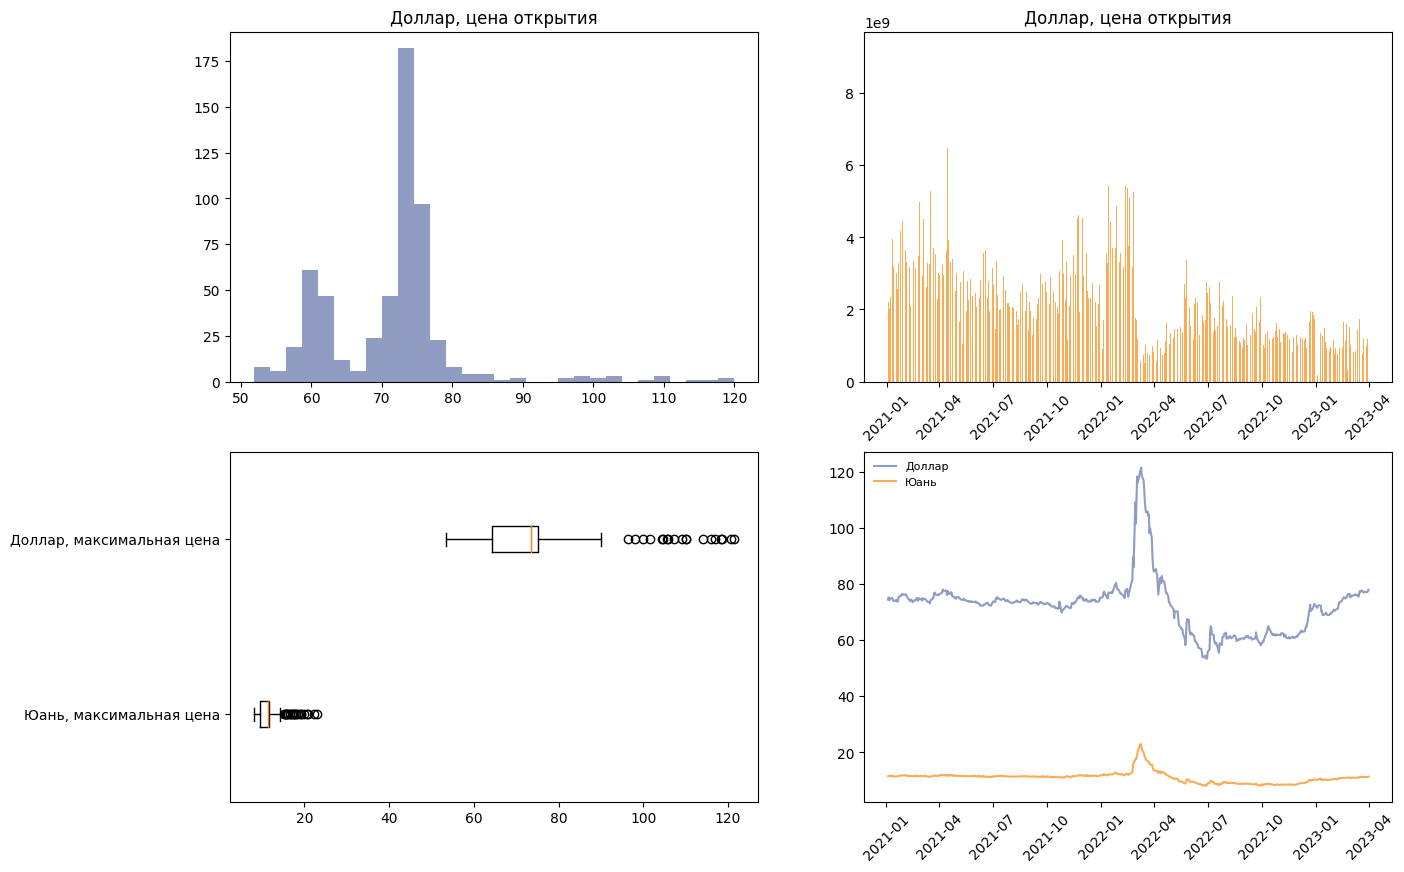

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(15,10))

#1 график
ax[0][0].hist(prices["Доллар, цена открытия"], bins=30, color = '#909CC2')#гистограмма
ax[0][0].set_title("Доллар, цена открытия") #заголовок

#2 график
gb = prices.groupby("Дата")["Доллар, объем торгов"].sum()
ax[0][1].bar(gb.index, gb.values, color = '#F9AB55')#столбчатая диаграмма
ax[0][1].set_title("Доллар, цена открытия") #заголовок
ax[0][1].set_xticklabels(ax[0][1].get_xticklabels(), rotation = 45) #переворачиваем значения по оси X


#3 график
ax[1][0].boxplot(prices[["Юань, цена максимальная цена", "Доллар, максимальная цена"]], vert = False)#ящик с усами
ax[1][0].set_yticklabels(["Юань, максимальная цена", "Доллар, максимальная цена"]) #подписи значений по оси Y

#4 график
ax[1][1].plot(prices['Дата'], prices["Доллар, максимальная цена"],
              label = "Доллар", color = '#909CC2')#линейный график 1
ax[1][1].plot(prices['Дата'], prices["Юань, цена максимальная цена"],
              label = "Юань", color = '#F9AB55')#линейный график 2
ax[1][1].set_xticklabels(ax[0][1].get_xticklabels(), rotation = 45) #переворачиваем значения по оси X
ax[1][1].legend(loc=2, fontsize=8, frameon=False);

## **Продвинутая визуализация `seaborn`**

In [ ]:
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/!hse_study/HSB_DS_22_23/sem/s5-6.corr.vis/dom_click.xlsx',
                   index_col = "Unnamed: 0")
df.head()

,rating_announcement,rating_announcement_change,region,announcement_count,announcement_count_resale,announcement_count_new,avg_price_resale,avg_price_new,rating_loan,rating_loan_change,min_numb_of_appr_loan,share_of_onln_loan,share_of_office_loan
0,1,0,Краснодарский Край,228037,75809,52225.0,127764,132270.0,3,0,5000.0,0.47,0.53
1,2,0,Московская Область,172242,57247,34838.0,153659,181756.0,1,1,10000.0,0.62,0.38
2,3,0,Москва,145131,65638,56824.0,275281,315195.0,2,-1,10000.0,0.60,0.40
3,4,0,Санкт-Петербург,93237,44008,40695.0,188425,236205.0,4,0,5000.0,0.53,0.47
4,5,1,Ростовская Область,88638,41625,17202.0,93333,105500.0,11,-2,5000.0,0.46,0.54


### Гистограмма

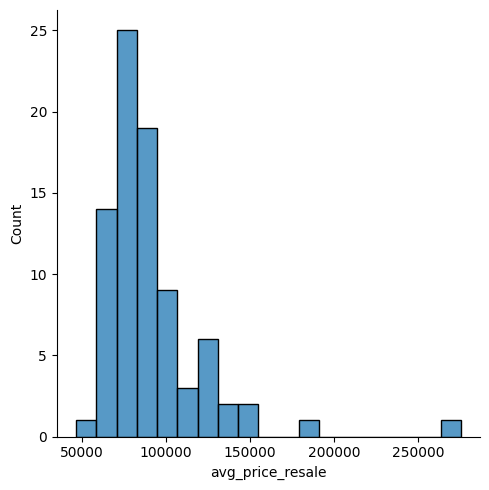

In [ ]:
sns.displot(df['avg_price_resale']);

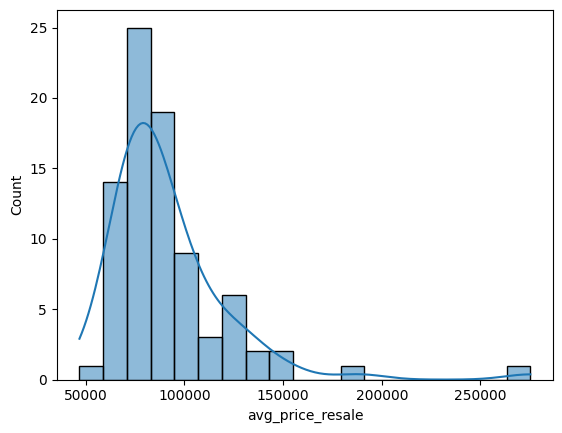

In [ ]:
sns.histplot(df['avg_price_resale'], kde = True);

### Ящик с усами

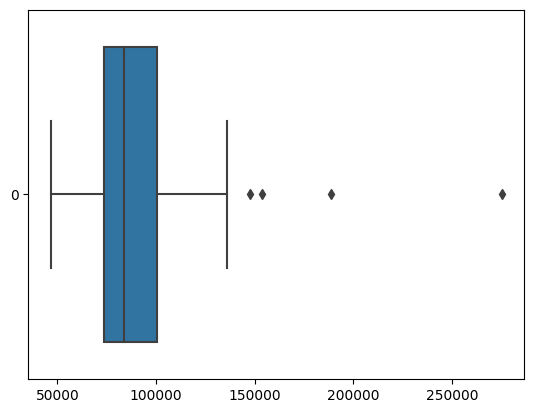

In [ ]:
sns.boxplot(df['avg_price_resale'], orient = "h");

<Axes: >

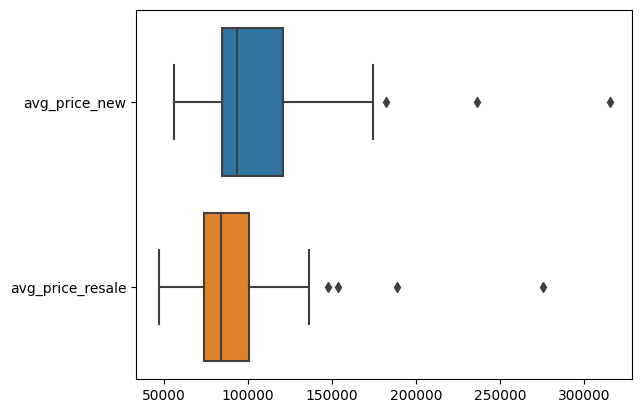

In [ ]:
sns.boxplot(data = df[["avg_price_new", "avg_price_resale"]], orient = 'h')

In [ ]:
df["share_diff"] = df.apply(lambda x: "Банк" if x["share_of_office_loan"]>x["share_of_onln_loan"]
                            else ("Oнлайн" if x["share_of_office_loan"]<x["share_of_onln_loan"]
                                  else "Банк/Онлайн"), axis =1)
df.head()

,rating_announcement,rating_announcement_change,region,announcement_count,announcement_count_resale,announcement_count_new,avg_price_resale,avg_price_new,rating_loan,rating_loan_change,min_numb_of_appr_loan,share_of_onln_loan,share_of_office_loan,share_diff
0,1,0,Краснодарский Край,228037,75809,52225.0,127764,132270.0,3,0,5000.0,0.47,0.53,Банк
1,2,0,Московская Область,172242,57247,34838.0,153659,181756.0,1,1,10000.0,0.62,0.38,Oнлайн
2,3,0,Москва,145131,65638,56824.0,275281,315195.0,2,-1,10000.0,0.60,0.40,Oнлайн
3,4,0,Санкт-Петербург,93237,44008,40695.0,188425,236205.0,4,0,5000.0,0.53,0.47,Oнлайн
4,5,1,Ростовская Область,88638,41625,17202.0,93333,105500.0,11,-2,5000.0,0.46,0.54,Банк


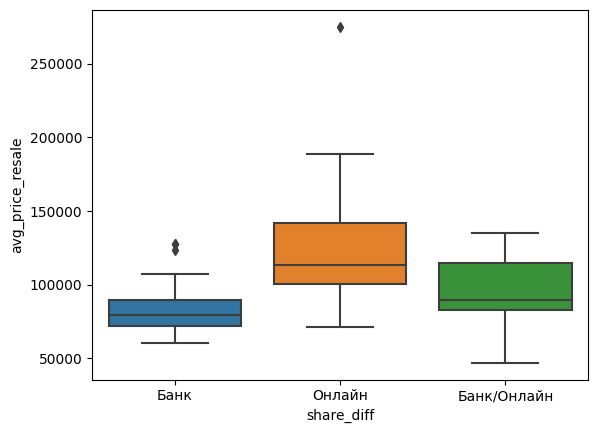

In [ ]:
sns.boxplot(x = "share_diff",  y = "avg_price_resale", data = df);

### Корреляционная матрица (тепловая карта)

In [ ]:
corr_data = df[[
    'announcement_count_resale',
    'avg_price_resale',
    'min_numb_of_appr_loan']].corr()
corr_data

,announcement_count_resale,avg_price_resale,min_numb_of_appr_loan
announcement_count_resale,1.00000,0.591700,0.747020
avg_price_resale,0.59170,1.000000,0.512949
min_numb_of_appr_loan,0.74702,0.512949,1.000000


<Axes: >

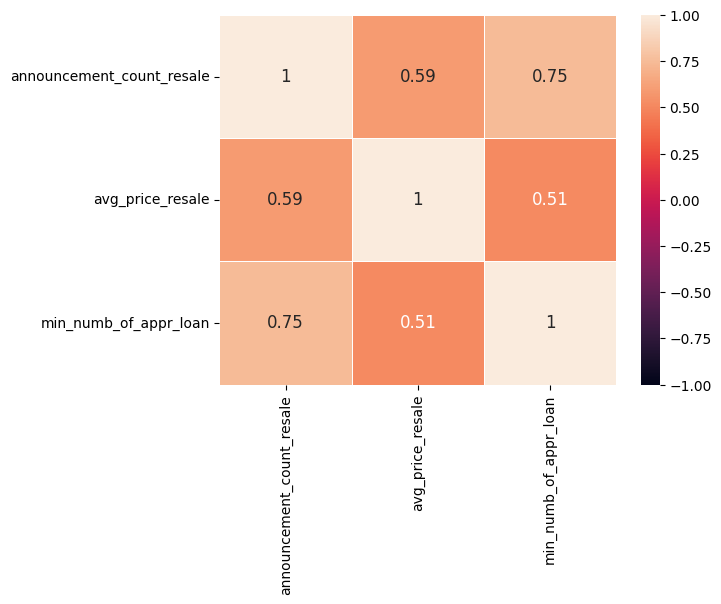

In [ ]:
sns.heatmap(
    corr_data, # на вход подается матрица корреляции, а не исходные данные!
    linewidths = 0.5, # толщина линии между квадратами
    annot = True, # добавить надписи со значениями коэффициента корреляции
#     cmap = 'viridis', # изменение цветовой шкалы
    vmax = 1, # максимальное значение шкалы
    vmin = -1, # минимальное значение шкалы
    linecolor = "white", # цвет линии, разделяющей график на квадраты
    annot_kws = {'size': 12} # размер шрифта (для annot параметра)
)

### `pairplot`

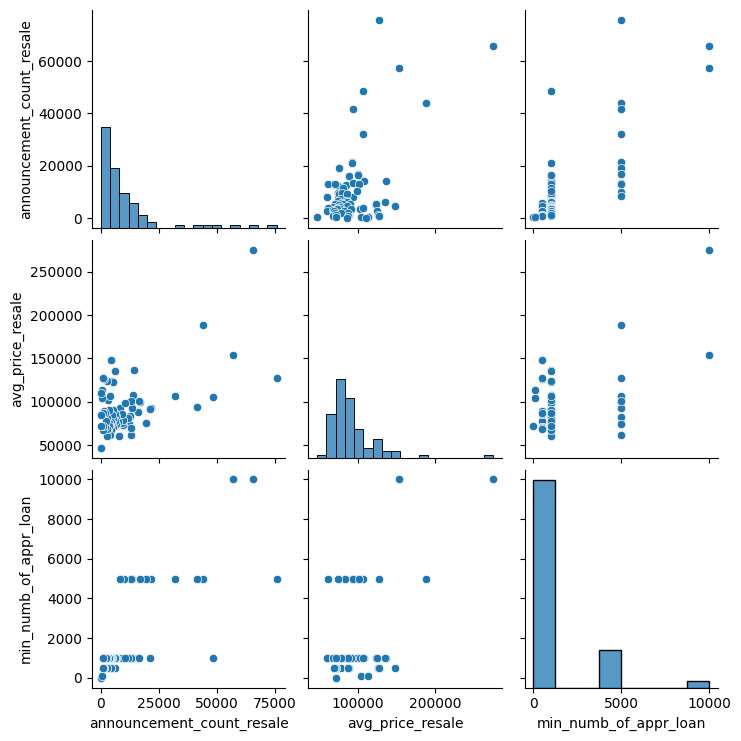

In [ ]:
sns.pairplot(
    df[[
    'announcement_count_resale',
    'avg_price_resale',
    'min_numb_of_appr_loan']],
    diag_kind = 'hist' # сюда можно вписать hist и вместо ядерных оценок плотности будут нарисованы гистограммы.
);

## **ПРАКТИКА**

Датасэт про посетителей ресторана

**total_bill** - размер чека

**tip** - размер чаевых

**sex** - кто оплачивал счет

**smoker** - зал для курящих/некурящих

**day** - день недели

**time** - время дня

**size** - количество гостей за столом

In [ ]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Задание 1

Визуализируйте среднюю выручку (**total_bill**) ресторана по времени (**time**) с помощью столбчатой диаграммы

- через `.plot()`

<Axes: xlabel='time'>

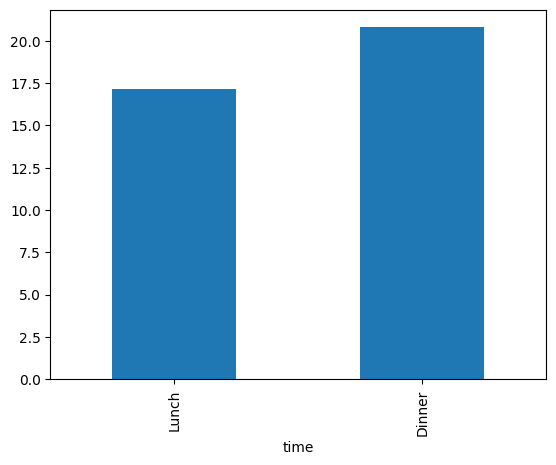

In [ ]:
gb = tips.groupby("time")["total_bill"].mean()
gb.plot(kind = "bar")

- через `matplolib`

-- Поместите заголовок

-- Подписать ось Y

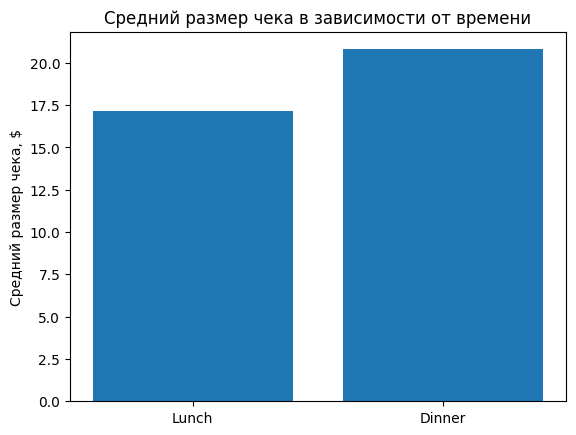

In [ ]:
from matplotlib import pyplot as plt
gb = tips.groupby("time")["total_bill"].mean()
plt.bar(gb.index, gb.values)
plt.title("Средний размер чека в зависимости от времени")
plt.ylabel("Средний размер чека, $");

In [ ]:
gb.index

CategoricalIndex(['Lunch', 'Dinner'], categories=['Lunch', 'Dinner'], ordered=False, dtype='category', name='time')

In [ ]:
gb.values

array([17.16867647, 20.79715909])

- через `subplots`

-- Добаваьте заголовок

-- Подписать ось Y

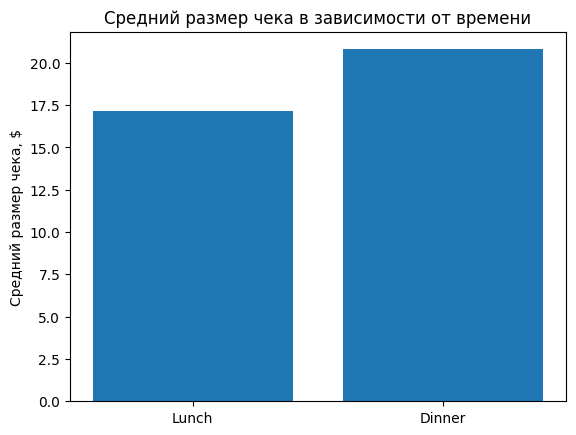

In [ ]:
fig, ax = plt.subplots(1,1)
ax.bar(gb.index, gb.values)
ax.set_title("Средний размер чека в зависимости от времени")
ax.set_ylabel("Средний размер чека, $");

- через `seaborn`

<Axes: xlabel='time', ylabel='total_bill'>

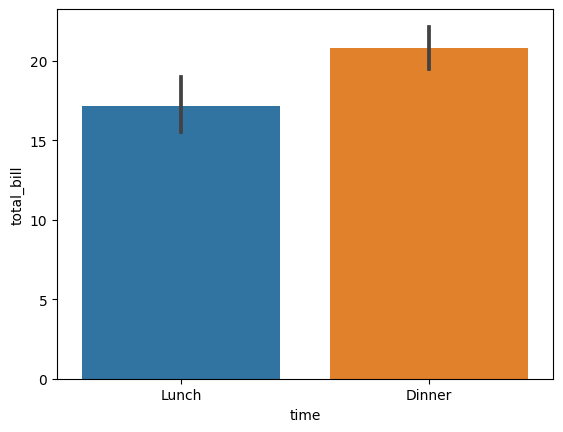

In [ ]:
sns.barplot(x = "time", y = "total_bill", data = tips)

### Задание 2

Постройте ящики с усами (горизонтальные) по размеру чека (**total_bill**) и размеру чаевых (**tip**)

- через `matplolib`

-- оба ящика на одном графике

-- подписать каждый ящик

- через `subplots`

-- для каждого ящика свой график (один по другим)

-- заголовок для каждого графика

- через `seaborn`

-- оба ящика на одном графике

-- подписать каждый ящик

### Задание 3

Постройте систему графиков из:
- гистограмма размер чека (и нанесите на гистограмму линии среднего, медианы и моды)
- гистограмму размера чаевых (и нанесите на гистограмму линии среднего, медианы и моды)
- ящики с усами по размеру чека и чаевых на одном графике (подписать каждый ящик)
- диаграмма рассеяния по размеру чека и чаевых (подпишите оси)

- через `subplots`

- через `seaborn`

Постройте систему графиков из:
- гистограмма размер чека
- гистограмму размера чаевых
- диаграмма рассеяния по размеру чека и чаевых
- regplot

In [ ]:
tips_f =  #извлеките два нужных признака из датасэта
g = sns.PairGrid(tips_f) #создаем систему графиков где будем рисовать
g.map_diag() #укажите какие графики будут по диагонали
g.map_upper()#укажите какой график будет выше диагонали
g.map_lower();#укажите какой график будет ниже диагонали